In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [65]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [66]:
print(gdp_df.shape)
print(gdp_df.info())

(7176, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


Answer--There are 4 colums.  They are Country or Area,  Year, Value, and Value Footnotes.

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [67]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

gdp_df = gdp_df.rename(columns={"Country or Area": "Country"})

gdp_df = gdp_df.rename(columns={"Value":"GDP_Per_Capita"})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [68]:
print(gdp_df["Year"].min())
print(gdp_df["Year"].max())
print(gdp_df.sort_values("Country"))
print(gdp_df.groupby("Country")["Year"].count()<31)
gdp_missing_years = gdp_df.groupby("Country")["Year"].count()<31
print(gdp_missing_years[gdp_missing_years==True])
print(gdp_missing_years[gdp_missing_years==False].count())
print(gdp_missing_years[gdp_missing_years==True].count())


1990
2020
          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
18    Afghanistan  2002     1189.784668
17    Afghanistan  2003     1235.810063
15    Afghanistan  2005     1286.793659
14    Afghanistan  2006     1315.789117
...           ...   ...             ...
7146     Zimbabwe  2019     2310.634802
7145     Zimbabwe  2020     2134.555461
7174     Zimbabwe  1991     2733.696626
7159     Zimbabwe  2006     1781.474597
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]
Country
Afghanistan                     True
Africa Eastern and Southern    False
Africa Western and Central     False
Albania                        False
Algeria                        False
                               ...  
Vietnam                        False
West Bank and Gaza              True
World                          False
Zambia                         False
Zimbabwe                       False
Name: Year, Length: 242, dtype: bool
Country
Afghanistan              

Answer--There are 205 countries with all 31 years, and there are 37 countries with missing years. The ones with missing years tended to have major unrest or wars during the time.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

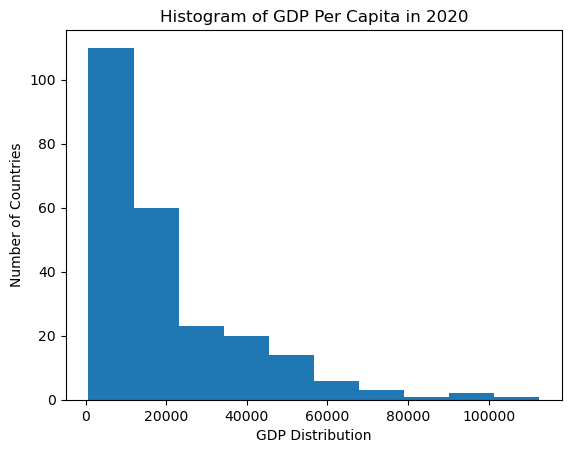

In [69]:
filter_gdp_2020 = gdp_df.loc[gdp_df["Year"] ==2020]
gdp_2020 = filter_gdp_2020[["GDP_Per_Capita"]]
plt.hist(gdp_2020)
plt.xlabel("GDP Distribution")
plt.ylabel("Number of Countries")
plt.title("Histogram of GDP Per Capita in 2020")
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

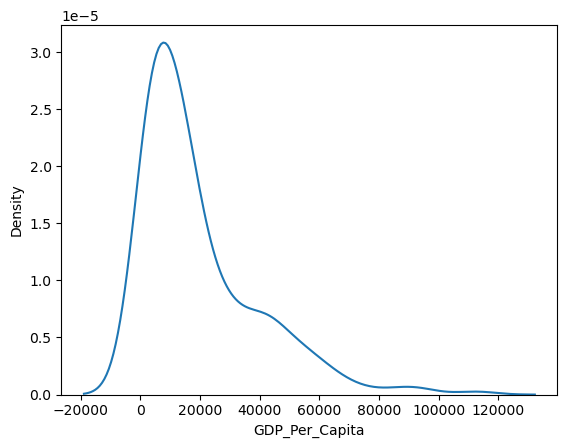

In [70]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

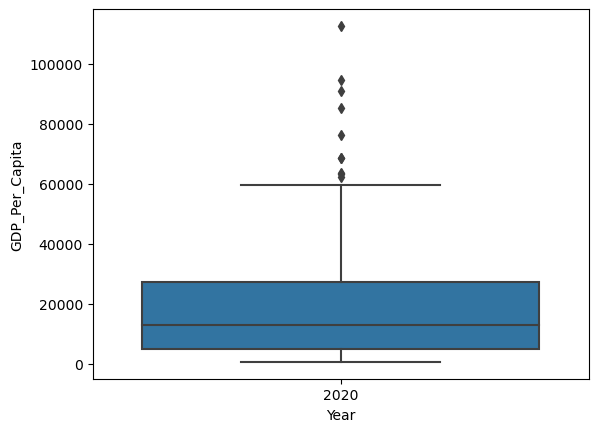

In [77]:
filter_gdp_2020 = gdp_df.loc[gdp_df["Year"] ==2020]
gdp_country_2020 = filter_gdp_2020[["Country","GDP_Per_Capita","Year"]]
sns.boxplot(x=gdp_country_2020["Year"],y=gdp_country_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

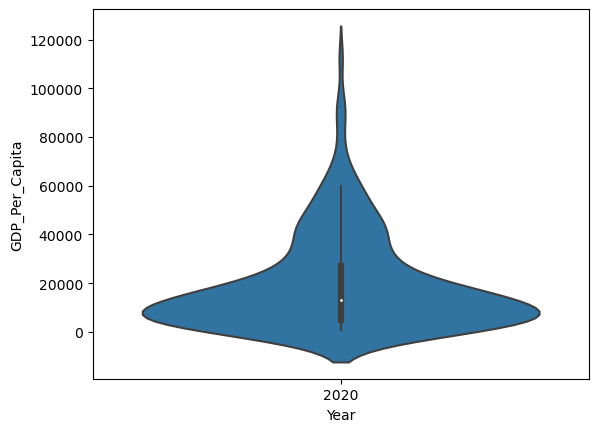

In [78]:
sns.violinplot(x=gdp_country_2020["Year"],y=gdp_country_2020["GDP_Per_Capita"])

Answer--The Histogram and Density Plot show easy to follow distributions.  The Boxplot and Violin plot do not without manually breaking down the data into smaller chunks.

What was the median GDP per capita value in 2020?

In [80]:
print(gdp_2020.describe())

       GDP_Per_Capita
count      240.000000
mean     19496.881712
std      19586.817493
min        731.064074
25%       4945.083068
50%      12908.937406
75%      27196.648661
max     112557.309472


Answer--It would be 12908.937406

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

A scatterplot

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

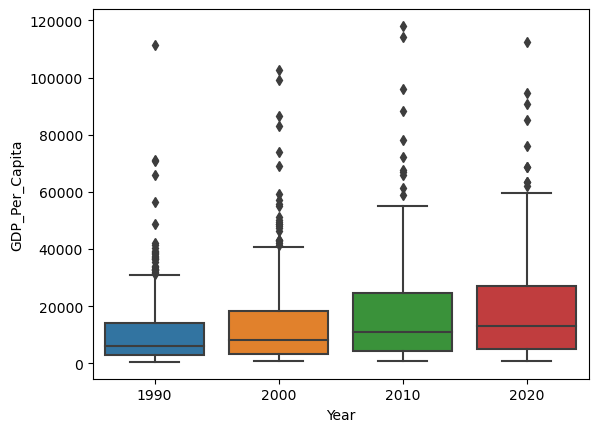

In [84]:
gdp_decades_filter = gdp_df.loc[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_decades = gdp_decades_filter[["GDP_Per_Capita","Year"]]
sns.boxplot(x=gdp_decades["Year"],y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

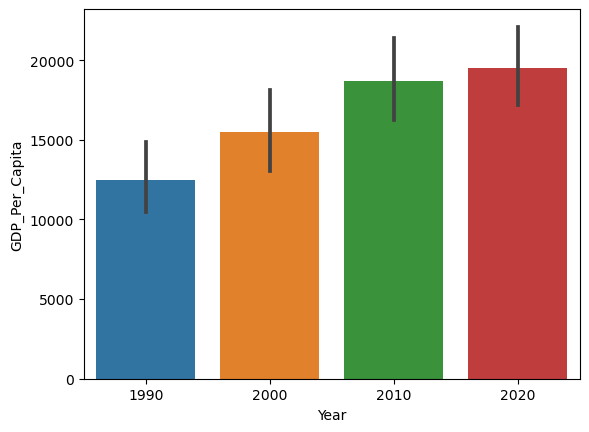

In [92]:
sns.barplot(x="Year",y="GDP_Per_Capita", data=gdp_decades)